In [1]:
import numpy as np
import struct

#filename = '../data/PMPM_RAW_BIN_60s_20241023_084401.csv'
filename='../data/PMPM_RAW_BIN_1m_20241116_084157.csv'
print('Reading file:',filename)

# Lire le fichier .csv qui contient le flux de bytes
with open(filename, 'rb') as f:
    byte_stream = f.read()  # Lire tout le fichier comme un flux de bytes
num_values = len(byte_stream) // 2  # Calcul du nombre d'entiers
values = []

for i in range(num_values):
    two_bytes = byte_stream[i*2:(i*2)+2]
    value = struct.unpack('<h', two_bytes)[0]  # '<h' pour 2 bytes en short int
    values.append(value)
print("List created with : {} elements".format(len(values)))
    
npValues=np.array(values, dtype=np.int16)
start_size=0
sound_size=50
accelX_size=50
accelY_size=50
accelZ_size=50
slice_size=start_size+sound_size+accelX_size+accelY_size+accelZ_size
num_slice = len(npValues)//slice_size # Nombre de tranches

#start_indices=np.concatenate([np.arange(i*slice_size, i*slice_size+start_size) for i in range(num_slice)])
sound_indices=np.concatenate([np.arange(i*slice_size+start_size, i*slice_size+sound_size+start_size) for i in range(num_slice)])
accelX_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size, i*slice_size+start_size+sound_size+accelX_size) for i in range(num_slice)])
accelY_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size+accelX_size, i*slice_size++start_size+sound_size+accelX_size+accelY_size) for i in range(num_slice)])
accelZ_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size+accelX_size+accelY_size, i*slice_size+slice_size) for i in range(num_slice)])
#startValues=npValues[start_indices]
soundValues=npValues[sound_indices]
accelXValues=npValues[accelX_indices]
accelYValues=npValues[accelY_indices]
accelZValues=npValues[accelZ_indices]

fs=50000
sample_table_size = 50
print("Data classified.\n Number of sampled sound values : {}, that is {}s \n Number of accel X values {}, that is {}s \n Number of accel Y values {}, that is {}s \n Number of accel Z values {}, that is {}s".format(len(soundValues), len(soundValues)/fs, len(accelXValues), len(accelXValues)/fs,len(accelYValues), len(accelYValues)/fs,len(accelZValues), len(accelZValues)/fs))

Reading file: ../data/PMPM_RAW_BIN_1m_20241116_084157.csv
List created with : 12000000 elements
Data classified.
 Number of sampled sound values : 3000000, that is 60.0s 
 Number of accel X values 3000000, that is 60.0s 
 Number of accel Y values 3000000, that is 60.0s 
 Number of accel Z values 3000000, that is 60.0s


In [2]:
import matplotlib.pyplot as plt
accelX=accelXValues.copy()
accelY=accelYValues.copy()
accelZ=accelZValues.copy()

print("Accel X in int16 Max Value is {}, Min Value is {}".format(np.max(accelX), np.min(accelX)))
print("Accel Y in int16 Max Value is {}, Min Value is {}".format(np.max(accelY), np.min(accelY)))
print("Accel Z in int16 Max Value is {}, Min Value is {}".format(np.max(accelZ), np.min(accelZ)))

def plot_Accel(accelValues, fs, start=0, end=-1, amplitude="m/s2", measUnit="m/s2"):
    plt.figure(figsize=(12, 8))
    x=np.arange(len(accelValues[start:end]))*1/fs
    
    if (measUnit=="g"):
        accelValues=accelValues/9.81
    plt.plot(x,accelValues[start:end], label='Acceleration in time', alpha=0.7)
    plt.legend()
    plt.title('Signal Accel X axis')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude'+amplitude)
    plt.show()
    
def plot_Sound(soundValues, fs, start=0, end=-1, measUnit="int16", title="Signal Audio"):
    plt.figure(figsize=(12, 8))
    x=np.arange(len(soundValues[start:end]))*1/fs
    
    plt.plot(x,soundValues[start:end], label='Acceleration in time', alpha=0.7)
    plt.legend()
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude ['+measUnit+']')
    plt.show()



Accel X in int16 Max Value is 169, Min Value is 95
Accel Y in int16 Max Value is 180, Min Value is 125
Accel Z in int16 Max Value is 163, Min Value is 97


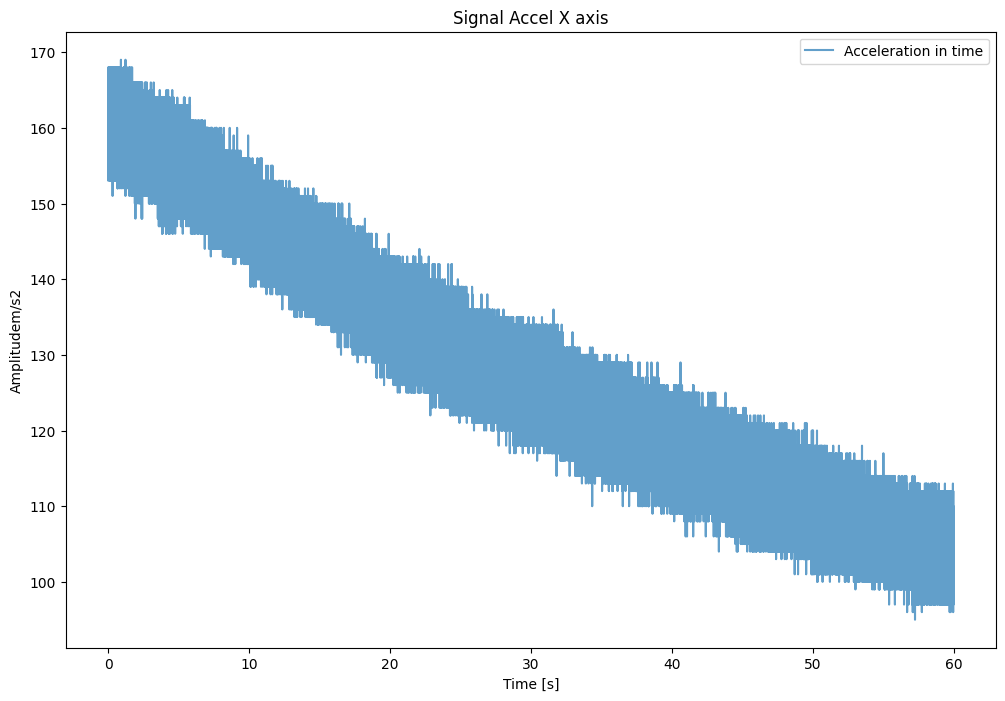

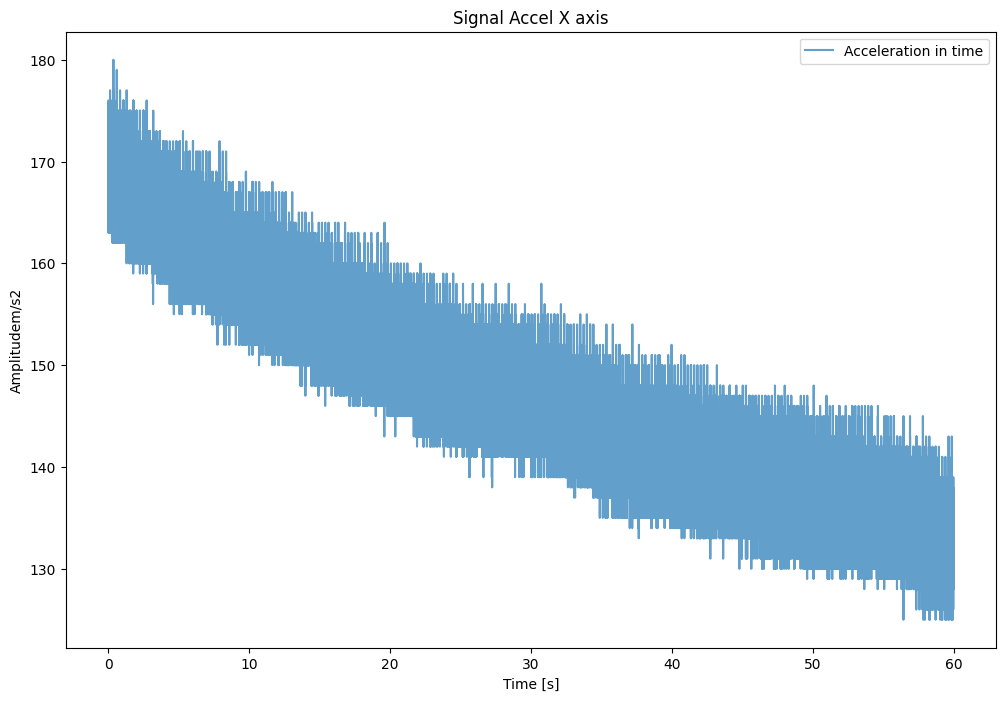

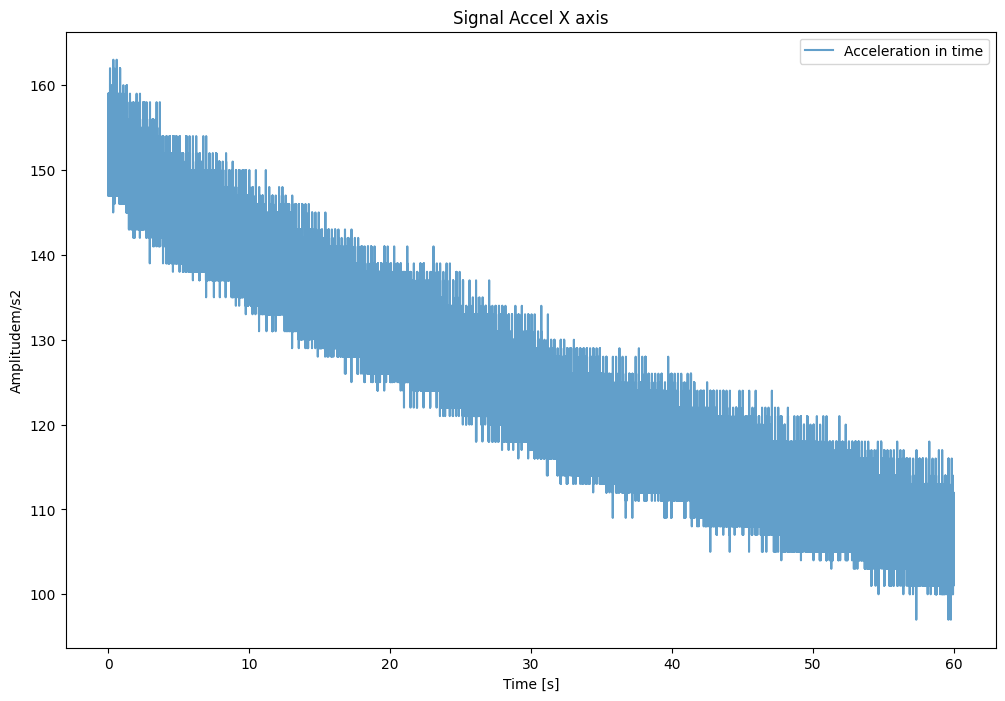

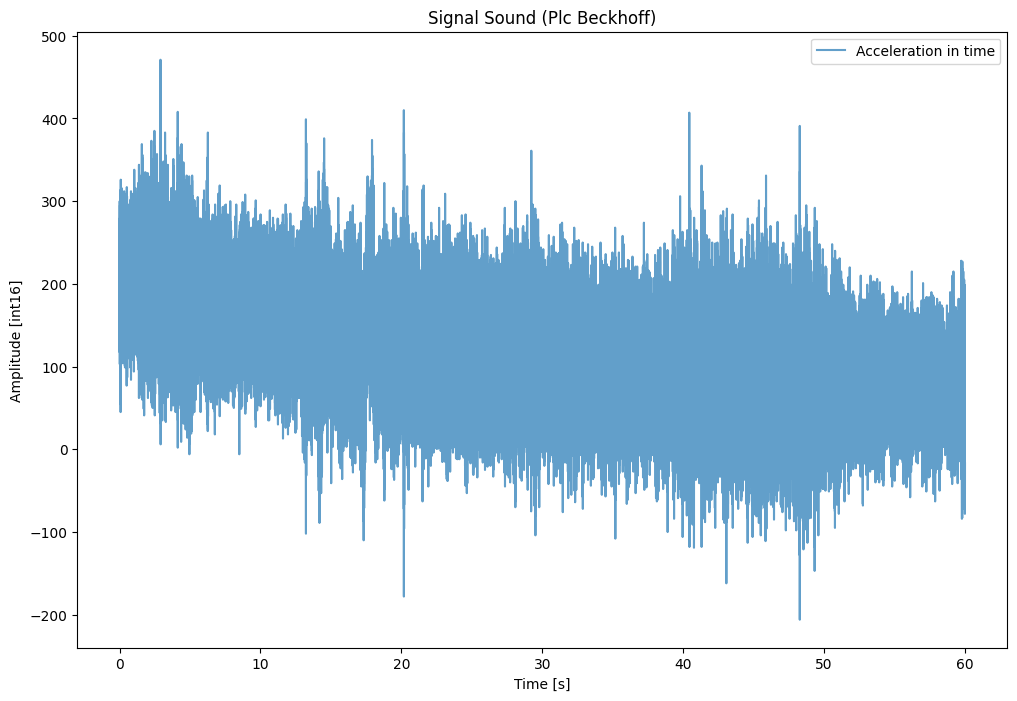

In [3]:
fs=50000
plot_Accel(accelX, fs, measUnit="m/s2")
plot_Accel(accelY, fs, measUnit="m/s2")
plot_Accel(accelZ, fs, measUnit="m/s2")
plot_Sound(soundValues, fs, measUnit="int16", title="Signal Sound (Plc Beckhoff)")

In [16]:
import sounddevice as sd
sd.play(soundValues,samplerate=fs)
sd.wait()

In [15]:
from scipy.io import wavfile
sample_rate=50000
wavfile.write("../data/mySound.wav", sample_rate, soundValues)
